# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/anand/.tensorflow/data/MNIST', validation_size=0)

Extracting /home/anand/.tensorflow/data/MNIST/train-images-idx3-ubyte.gz
Extracting /home/anand/.tensorflow/data/MNIST/train-labels-idx1-ubyte.gz
Extracting /home/anand/.tensorflow/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting /home/anand/.tensorflow/data/MNIST/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

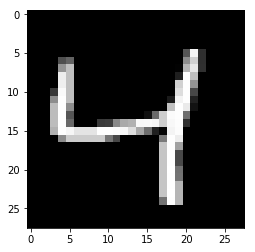

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6902
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6830
Epoch: 1/20... Training loss: 0.6782
Epoch: 1/20... Training loss: 0.6724
Epoch: 1/20... Training loss: 0.6655
Epoch: 1/20... Training loss: 0.6578
Epoch: 1/20... Training loss: 0.6471
Epoch: 1/20... Training loss: 0.6370
Epoch: 1/20... Training loss: 0.6251
Epoch: 1/20... Training loss: 0.6126
Epoch: 1/20... Training loss: 0.5970
Epoch: 1/20... Training loss: 0.5841
Epoch: 1/20... Training loss: 0.5651
Epoch: 1/20... Training loss: 0.5479
Epoch: 1/20... Training loss: 0.5334
Epoch: 1/20... Training loss: 0.5125
Epoch: 1/20... Training loss: 0.4929
Epoch: 1/20... Training loss: 0.4804
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4427
Epoch: 1/20... Training loss: 0.4248
Epoch: 1/20... Training loss: 0.4103
Epoch: 1/20... Training loss: 0.3954
Epoch: 1/20... Training loss: 0.3770
Epoch: 1/20... Training loss: 0.3697
E

Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1784
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1854
E

Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1563
E

Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1318
E

Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1169
E

Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1110
E

Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.0980
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1028
E

Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0984
E

Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0945
E

Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Trai

Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.1023
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0889
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.1000
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0878
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

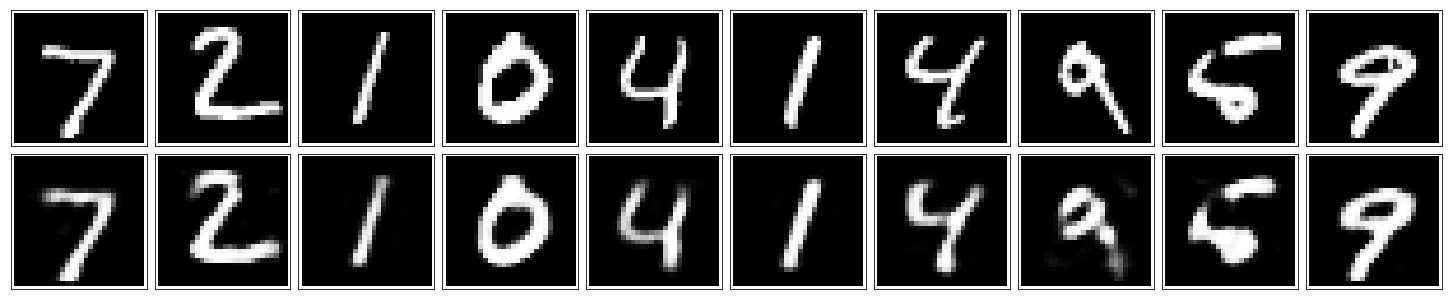

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.